# Neural Networks
In the previous part of this exercise, you implemented multi-class logistic re gression to recognize handwritten digits. However, logistic regression cannot form more complex hypotheses as it is only a linear classifier.<br><br>

In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same training set as before. The <strong>neural network</strong> will be able to represent complex models that form <strong>non-linear hypotheses</strong>. For this week, you will be using parameters from <strong>a neural network that we have already trained</strong>. Your goal is to implement the <strong>feedforward propagation algorithm to use our weights for prediction</strong>. In next week’s exercise, you will write the backpropagation algorithm for learning the neural network parameters.<br><br>

The file <strong><em>ex3data1</em></strong> contains a training set.<br>
The structure of the dataset described blow:<br>
1. X array = <strong>400 columns describe the values of pixels of 20*20 images in flatten format for 5000 samples</strong>
2. y array = <strong>Value of image (number between 0-9)</strong>


<br><br>
<strong>
Our assignment has these sections:
1. Visualizing the Data
    1. Converting .mat to .csv
    2. Loading Dataset
    3. Ploting Data
2. Model Representation
3. Feedforward Propagation and Prediction
</strong>

In each section full description provided.

## 1. Visualizing the Dataset
Before starting on any task, it is often useful to understand the data by visualizing it.<br>

### 1.A Converting .mat to .csv
In this specific assignment, the instructor added a .mat file as training set and weights of trained neural network. But we have to convert it to .csv to use in python.<br>
After all we now ready to import our new csv files to pandas dataframes and do preprocessing on it and make it ready for next steps.

In [3]:
# import libraries
import scipy.io
import numpy as np

data = scipy.io.loadmat("ex3data1")
weights = scipy.io.loadmat('ex3weights')

Now we extract X and y variables from the .mat file and save them into .csv file for further usage. After running the below code <strong>you should see X.csv and y.csv files</strong> in your directory.

In [5]:
for i in data:
    if '__' not in i and 'readme' not in i:
        np.savetxt((i+".csv"),data[i],delimiter=',')
        
for i in weights:
    if '__' not in i and 'readme' not in i:
        np.savetxt((i+".csv"),weights[i],delimiter=',')

### 1.B Loading Dataset and Trained Neural Network Weights
First we import .csv files into pandas dataframes then save them into numpy arrays.<br><br>
There are <strong>5000 training examples</strong> in ex3data1.mat, where each training example is a <strong>20 pixel by 20 pixel <em>grayscale</em> image of the digit</strong>. Each pixel is represented by a floating point number indicating the <strong>grayscale intensity</strong> at that location. The 20 by 20 grid of pixels is <strong>"flatten" into a 400-dimensional vector</strong>. <strong>Each of these training examples becomes a single row in our data matrix X</strong>. This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image.<br><br>
The second part of the training set is a <strong>5000-dimensional vector y that contains labels</strong> for the training set.<br><br>
<strong>Notice: In dataset, the digit zero mapped to the value ten. Therefore, a "0" digit is labeled as "10", while the digits "1" to "9" are labeled as "1" to "9" in their natural order.<br></strong>
But this make thing harder so we bring it back to natural order for 0!

In [6]:
# import library
import pandas as pd

# saving .csv files to pandas dataframes
x_df = pd.read_csv('X.csv',names= np.arange(0,400))
y_df = pd.read_csv('y.csv',names=['label'])

In [17]:
# saving .csv files to pandas dataframes
Theta1_df = pd.read_csv('Theta1.csv',names = np.arange(0,401))
Theta2_df = pd.read_csv('Theta2.csv',names = np.arange(0,26))

In [19]:
# saving x_df and y_df into numpy arrays
x = x_df.iloc[:,:].values
y = y_df.iloc[:,:].values

m, n = x.shape

# bring back 0 to 0 !!!
y = y.reshape(m,)
y[y==10] = 0
y = y.reshape(m,1)

print('#{} Number of training samples, #{} features per sample'.format(m,n))

#5000 Number of training samples, #400 features per sample


In [21]:
# saving Theta1_df and Theta2_df into numpy arrays
theta1 = Theta1_df.iloc[:,:].values
theta2 = Theta2_df.iloc[:,:].values

### 1.C Plotting Data
You will begin by visualizing a subset of the training set. In first part, the code <strong>randomly selects selects 100 rows from X</strong> and passes those rows to the <strong>display_data</strong> function. This function maps each row to a 20 pixel by 20 pixel grayscale image and displays the images together.<br>
After plotting, you should see an image like this:<img src='img/plot.jpg'>

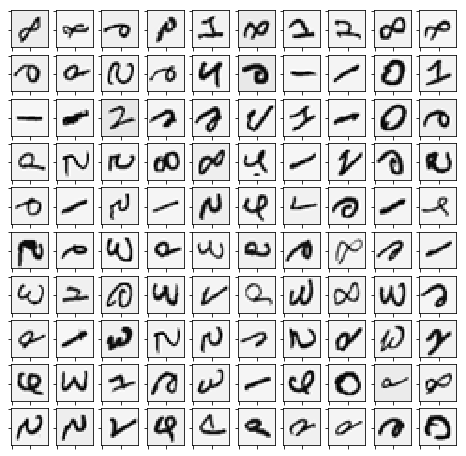

[ 8.  8.  6.  5.  4.  8.  4.  4.  8.  8.  6.  9.  5.  6.  2.  6.  1.  1.
  0.  4.  1.  1.  4.  6.  6.  7.  4.  1.  0.  6.  9.  5.  5.  8.  8.  2.
  1.  7.  6.  5.  6.  1.  5.  1.  5.  2.  7.  6.  1.  2.  5.  6.  3.  9.
  3.  9.  6.  8.  6.  1.  3.  4.  6.  3.  7.  9.  3.  8.  3.  6.  9.  1.
  3.  5.  5.  6.  5.  9.  3.  4.  2.  3.  4.  6.  3.  1.  2.  0.  9.  8.
  5.  5.  7.  2.  4.  9.  9.  9.  6.  0.]


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random

amount = 100
lines = 10
columns = 10
image = np.zeros((amount, 20, 20))
number = np.zeros(amount)

for i in range(amount):
    rnd = random.randint(0,4999)
    image[i] = x[rnd].reshape(20, 20)
    y_temp = y.reshape(m,)
    number[i] = y_temp[rnd]
fig = plt.figure(figsize=(8,8))

for i in range(amount):
    ax = fig.add_subplot(lines, columns, 1 + i)
    
    # Turn off tick labels
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(image[i], cmap='binary')
plt.show()
print(number)